# Finding Waldo

## Template Matching

There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag **cv2.TM_CCOEFF.**

So what exactly is the cv2.matchTemplate function doing?
Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is. 

Regions with sufficiently high correlation can be considered “matches” for our waldo template.
From there, all we need is a call to cv2.minMaxLoc to find where our “good” matches are.

http://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html      

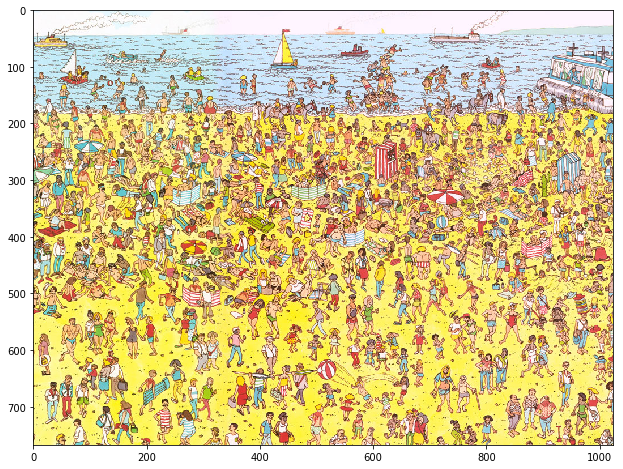

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# Load input image and convert to grayscale
image = cv2.imread('images/WaldoBeach.jpg')
plt.figure(figsize= (12,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('images/waldo.jpg',0)

# The Used Method
method = cv2.TM_CCOEFF

In [2]:
# Apply template Matching
res = cv2.matchTemplate(gray,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

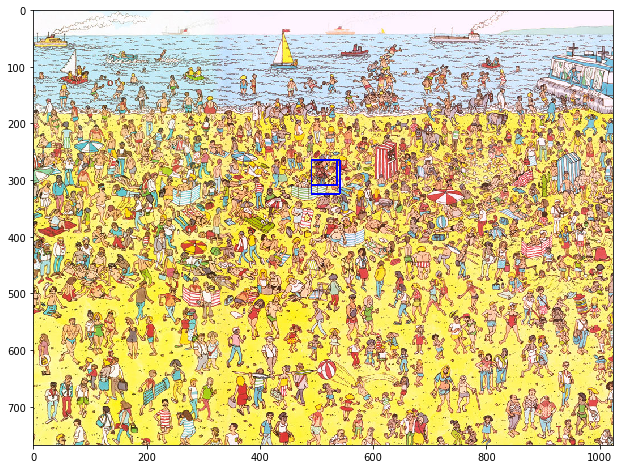

In [4]:
top_left = max_loc
bottom_right = (top_left[0] + 45, top_left[1] + 45)
cv2.rectangle(image,top_left, bottom_right, 255, 2)
plt.figure(figsize= (12,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

** This Method is'nt very resilient **
* Rotation renders this method ineffective
* Size (scaling)
* Photometric changes (e.g. brightness, contrast, hue etc.)
* Distoritions from view point changes